In [1]:
import seaborn as sns # visualization
import math as m 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll
def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [3]:
#data = pd.read_csv("https://github.com/treselle-systems/customer_churn_analysis/blob/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(r"E:\ML and DL\Data_csv\Titanic.csv")
print("Dataset size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Dataset size
Rows 891 Columns 12


In [4]:
null = []
for col in df :
    for i in range(len(df[col])) :
        if str(df[col][i]) == 'nan':
            null.append(1)
    print(f'column is {col}',len(null))
        

column is PassengerId 0
column is Survived 0
column is Pclass 0
column is Name 0
column is Sex 0
column is Age 177
column is SibSp 177
column is Parch 177
column is Ticket 177
column is Fare 177
column is Cabin 864
column is Embarked 866


In [5]:
for col in df:
    if col == 'Cabin':
        pass
    elif col == 'Embarked':
        df[col].replace(np.nan,'S',inplace = True)
    else:
        for i in range(len(df)):
            if str(df.loc[i,col]) == 'nan':
                df.loc[i,col] = df[col].median()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
PassengerId    int64
Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object

In [9]:
df = df.copy()

In [10]:
Sex = ["female", "male"]
fig = {
    'data': [
        {
            'x': df.loc[(df['Embarked']=='S')] ,
            'y': df.loc[(df['Cabin']=='B96 B98')],
            'name': churn, 'mode': 'markers',
        } for churn in Sex
    ],
    'layout': {
        'title': 'Tenure vs Monthly Charges',
        'xaxis': {'title': 'Monthly Charges'},
        'yaxis': {'title': "Tenure"}
    }
}

py.offline.iplot(fig)

In [11]:
figs = []


for churn in Sex:
    figs.append(
        go.Box(
            y = df.loc[(df['Sex']==churn)],
            name = churn
        )
    )
layout = go.Layout(
    title = "Tenure",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "Tenure"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

In [12]:
figs = []
Sex = ['female']
for churn in Sex:
    figs.append(
        go.Box(
            y = df.loc[(df['Sex']==churn)],
            name = churn
        )
    )
layout = go.Layout(
    title = "MonthlyCharges",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "MonthlyCharges"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

In [13]:
_ = df.groupby('Embarked').size().reset_index()
# .sort_values(by='tenure', ascending=True)

data = [go.Bar(
    x = _['Embarked'].tolist(),
    y = _[0].tolist(),
    marker=dict(
        color=['rgba(255,190,134,1)', 'rgba(142,186,217,1)'])
)]
layout = go.Layout(
    title = "Embarked distribution",
    xaxis = {"title" : "Embarked?"},
    width=800,
    height=500
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [14]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis = 1,inplace = True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
cases = len(df)
nonfraud_count = len(df[df.Survived == 0])
fraud_count = len(df[df.Survived == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

In [17]:
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 891
Number of Non-fraud cases are 549
Number of fraud cases are 342
Percentage of fraud cases is 62.3
--------------------------------------------


In [18]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [19]:
nonfraud_cases = df[df.Survived == 0]
fraud_cases = df[df.Survived == 1]

In [20]:
print(cl('CASE Fare STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE Fare STATS', attrs = ['bold']))
print(pd.DataFrame(nonfraud_cases.Fare.describe()))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE Fare STATS', attrs = ['bold']))
print(pd.DataFrame(fraud_cases.Fare.describe()).rename(columns = {0:'Fare'}))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE Fare STATISTICS
--------------------------------------------
NON-FRAUD CASE Fare STATS
             Fare
count  549.000000
mean    22.117887
std     31.388207
min      0.000000
25%      7.854200
50%     10.500000
75%     26.000000
max    263.000000
--------------------------------------------
FRAUD CASE Fare STATS
             Fare
count  342.000000
mean    48.395408
std     66.596998
min      0.000000
25%     12.475000
50%     26.000000
75%     57.000000
max    512.329200
--------------------------------------------


In [21]:
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('Percentage of Non-fraud cases is {}'.format(100-fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 891
Number of Non-fraud cases are 549
Number of Non-fraud cases are 342
Percentage of fraud cases is 62.3
Percentage of Non-fraud cases is 37.7
--------------------------------------------


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
df['Survived'] = df['Sex'].apply(lambda x : 1 if x == "male" else 0)
# features will be saved as X and our target will be saved as y
X = df[['Pclass']].copy()
X2 = df[['Age']].copy()
y = df['Survived'].copy()

In [24]:
start_time = time.time()

num_iter = 100000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):12.545783519744873 seconds
Learning rate: 0.1
Iteration: 100000


In [6]:
import time 
start_time = time.time()
count = 0
for i in range(1000000000):
    count += 1
print("time:" + str(round((time.time() - start_time)/60,9)) + " mintues")

time:1.34110715 mintues


In [25]:
result = sigmoid(X, theta)

In [26]:
result = sigmoid(X, theta)
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['Survived']].shape[0] / f.shape[0] * 100
f

Accuracy (Loss minimization):


0  Survived  pred
0    0.699277         1     1
1    0.547894         0     1
2    0.699277         0     1
3    0.547894         0     1
4    0.699277         1     1
..        ...       ...   ...
886  0.626683         1     1
887  0.547894         0     1
888  0.699277         0     1
889  0.547894         1     1
890  0.699277         1     1

[891 rows x 3 columns]

In [27]:
start_time = time.time()
num_iter = 100000

intercept2 = np.ones((X2.shape[0], 1))
X2 = np.concatenate((intercept2, X2), axis=1)
theta2 = np.zeros(X2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(X2, theta2)
    gradient2 = gradient_ascent(X2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using MLE):15.634519815444946seconds
Learning rate: 0.1
Iteration: 100000


In [28]:
result2 = sigmoid(X2, theta2)

In [29]:
print("Accuracy (Maximum Likelihood Estimation):")
result2 = sigmoid(X2, theta2)
f2 = pd.DataFrame(result2).join(y)
print(f2.loc[f2[0] == f2['Survived']].shape[0] / f2.shape[0] * 100)

f2

Accuracy (Maximum Likelihood Estimation):
61.84062850729517


0  Survived
0    1.0         1
1    1.0         0
2    1.0         0
3    1.0         0
4    1.0         1
..   ...       ...
886  1.0         1
887  1.0         0
888  1.0         0
889  1.0         1
890  1.0         1

[891 rows x 2 columns]

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=100000)
clf.fit(df[['Parch','Pclass']], y)
print("Training time (sklearn's LogisticRegression module):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (sklearn's LogisticRegression module):15.859332084655762 seconds
Learning rate: 0.1
Iteration: 100000


In [31]:
result3 = clf.predict(df[['Parch','Pclass']])

In [32]:
print("Accuracy (sklearn's Logistic Regression):")
f3 = pd.DataFrame(result3).join(y)
f3.loc[f3[0]==f3['Survived']].shape[0] / f3.shape[0] * 100

Accuracy (sklearn's Logistic Regression):


67.90123456790124

In [33]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         1       3    male  22.0      1      0   7.2500        S
1         0       1  female  38.0      1      0  71.2833        C
2         0       3  female  26.0      0      0   7.9250        S
3         0       1  female  35.0      1      0  53.1000        S
4         1       3    male  35.0      0      0   8.0500        S

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder
for f in df.columns:
    lbl = LabelEncoder()
    if df[f].dtype=='object':
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         1       3    1  22.0      1      0   7.2500         2
1         0       1    0  38.0      1      0  71.2833         0
2         0       3    0  26.0      0      0   7.9250         2
3         0       1    0  35.0      1      0  53.1000         2
4         1       3    1  35.0      0      0   8.0500         2

In [36]:
df.isna().sum()
df.dropna(axis = 0,inplace =True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
feature_df = list(df.columns)
feature_df.remove('Survived')
x = df[feature_df]
y = df['Survived']
x

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  28.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

print("x_train shape: {}  Rows {} Columns {}".format(x_train.shape,x_train.shape[0],x_train.shape[1]))
print("y_train shape: {} Rows {} Columns 1".format(y_train.shape,y_train.shape[0]))
print("x_test shape: {} Rows {} Columns {}".format(x_test.shape,x_test.shape[0],x_test.shape[1]))
print("y_test shape: {} Rows {} Columns 1".format(y_test.shape,y_test.shape[0]))
print('###'*30)
print(cl('X_train samples : ', attrs = ['bold']), x_train[:1].values)
print(cl('X_test samples : ', attrs = ['bold']), x_test[0:1].values)
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10].values)
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10].values)

x_train shape: (623, 7)  Rows 623 Columns 7
y_train shape: (623,) Rows 623 Columns 1
x_test shape: (268, 7) Rows 268 Columns 7
y_test shape: (268,) Rows 268 Columns 1
##########################################################################################
X_train samples :  [[ 1.    1.   51.    0.    0.   26.55  2.  ]]
X_test samples :  [[ 3.      1.     28.      0.      0.     14.4583  0.    ]]
y_train samples :  [1 0 1 1 0 1 1 1 1 1]
y_test samples :  [1 1 1 0 0 1 0 0 1 0]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score,f1_score

############################################################
param_dist = {'objective':'binary:logistic', 'n_estimators':2}
models = {
    "LG": LogisticRegression(fit_intercept=True, max_iter=100000),
    "KNNC" : KNeighborsClassifier(), 
    "SVC": SVC(max_iter=100000),
    "Naive Bays": GaussianNB(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGBC": XGBClassifier(),
   "AdaBoostClassifier": AdaBoostClassifier(),
  "CatBoostClassifier" : CatBoostClassifier(silent=True),
  "GradientBoostingClassifier" : GradientBoostingClassifier(),
  "LGBMClassifier" : LGBMClassifier(),
  "XGBRFClassifier" : XGBRFClassifier(**param_dist)
}
##############################################################

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print('Training of the {} Score is {:.0%}:'.format(name,model.score(x_train, y_train)))
    print('Test Score of the {} is {:.0%}:'.format(name,model.score(x_test, y_test)))  
    y_pred = model.predict(x_test)
    print(('Accuracy of the {} is {:.0%}'.format(name,accuracy_score(y_test, y_pred))))
    print(cl('F1 score of the {} is {:.0%}'.format(name,f1_score(y_test, y_pred)), attrs = ['bold']))
    print(cl('###################################################################################', attrs = ['bold']))

Using model: LG
Training of the LG Score is 100%:
Test Score of the LG is 100%:
Accuracy of the LG is 100%
F1 score of the LG is 100%
###################################################################################
Using model: KNNC
Training of the KNNC Score is 83%:
Test Score of the KNNC is 70%:
Accuracy of the KNNC is 70%
F1 score of the KNNC is 79%
###################################################################################
Using model: SVC
Training of the SVC Score is 69%:
Test Score of the SVC is 66%:
Accuracy of the SVC is 66%
F1 score of the SVC is 78%
###################################################################################
Using model: Naive Bays
Training of the Naive Bays Score is 100%:
Test Score of the Naive Bays is 100%:
Accuracy of the Naive Bays is 100%
F1 score of the Naive Bays is 100%
###################################################################################
Using model: DT
Training of the DT Score is 100%:
Test Score of the DT is 100%:
A

In [40]:
import itertools
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model  Accuracy   AUC
0                           LR  1.000000  1.00
1                         KNNC  0.697761  0.63
2                          SVC  0.664179  0.57
3                   Naive Bays  1.000000  1.00
4                           DT  1.000000  1.00
5                           RF  1.000000  1.00
6                         XGBC  1.000000  1.00
7           AdaBoostClassifier  1.000000  1.00
8           CatBoostClassifier  1.000000  1.00
9   GradientBoostingClassifier  1.000000  1.00
10              LGBMClassifier  1.000000  1.00
11             XGBRFClassifier  1.000000  1.00

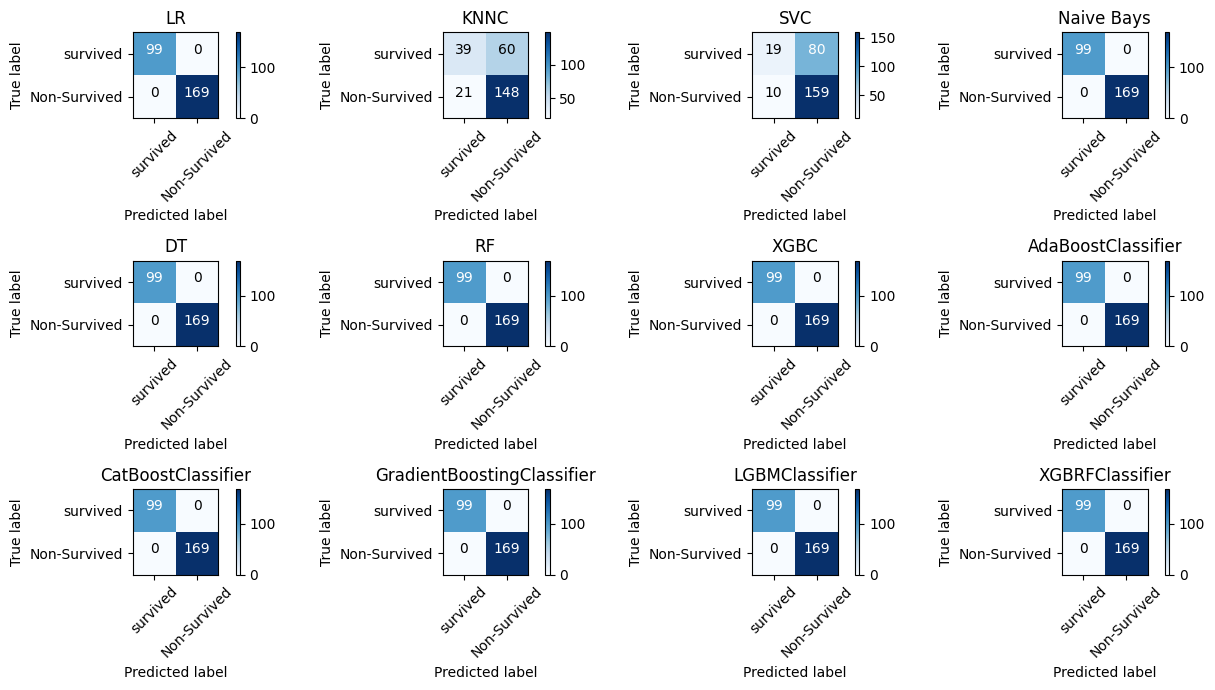

In [63]:
import itertools
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = '{}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
import seaborn as sns
############################################################

model_pipeline = []
model_pipeline.append(LogisticRegression(solver = 'liblinear'))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(SVC())
model_pipeline.append(GaussianNB())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(XGBClassifier())
model_pipeline.append(AdaBoostClassifier())
model_pipeline.append(CatBoostClassifier(silent=True))
model_pipeline.append(GradientBoostingClassifier())
model_pipeline.append(LGBMClassifier())
model_pipeline.append(XGBRFClassifier(**param_dist))
#############################################################

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list = ["LR","KNNC","SVC","Naive Bays","DT","RF","XGBC","AdaBoostClassifier","CatBoostClassifier","GradientBoostingClassifier","LGBMClassifier","XGBRFClassifier"]
acc_list = []
auc_list = []
cm_list = []
for model in model_pipeline:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))
###############################################################

fig = plt.figure(figsize=(13,7))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3,4,i+1).set_title(model)
    cm_plot = plot_confusion_matrix(cm,classes = ['survived','Non-Survived'], normalize = False, title = model)
##############################################################
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

In [42]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         1       3    1  22.0      1      0   7.2500         2
1         0       1    0  38.0      1      0  71.2833         0
2         0       3    0  26.0      0      0   7.9250         2
3         0       1    0  35.0      1      0  53.1000         2
4         1       3    1  35.0      0      0   8.0500         2

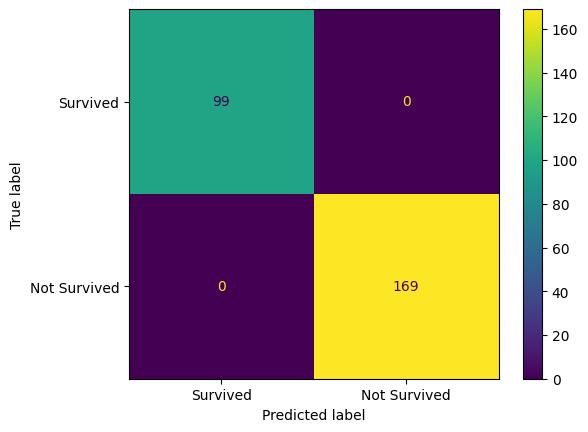

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f = SVC(random_state=0)
clf.fit(x_train, y_train)
SVC(random_state=0)
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Survived','Not Survived'])
disp.plot()

plt.show()

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator

<bound method ConfusionMatrixDisplay.from_estimator of <class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>>

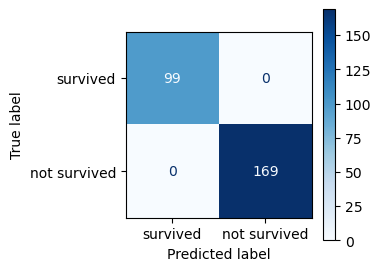

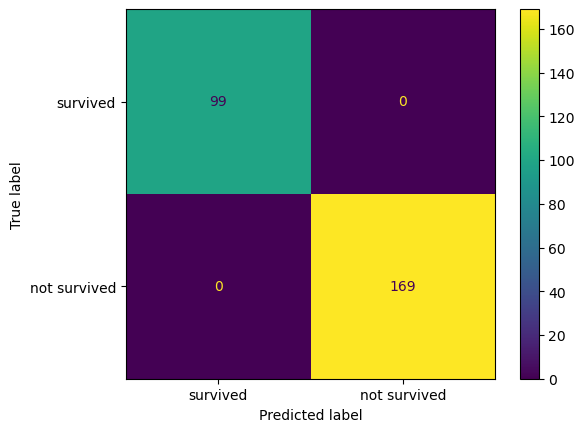

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                  labels=[0,1],
                  cmap=plt.cm.Blues,
                  display_labels=['survived','not survived'], 
                  values_format='',  
) 
fig = disp.ax_.get_figure() 

fig.set_figwidth(3)
fig.set_figheight(3) 
disp.plot()

In [80]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [81]:
df['Survived'].unique()

array([1, 0], dtype=int64)

In [82]:
class_names = ['survived','not survived']

Confusion matrix, without normalization
[[ 39  60]
 [ 21 148]]
Normalized confusion matrix
[[0.39393939 0.60606061]
 [0.12426036 0.87573964]]


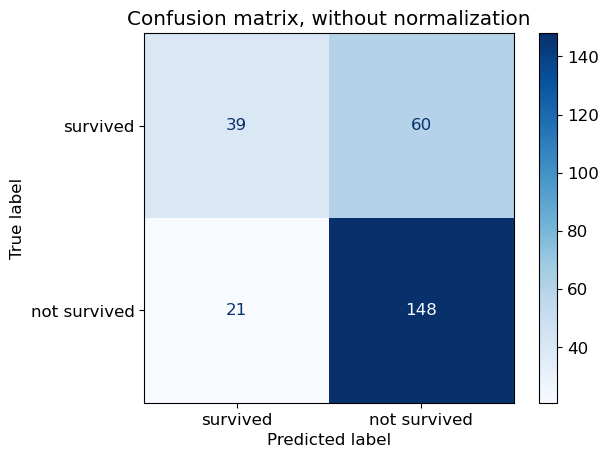

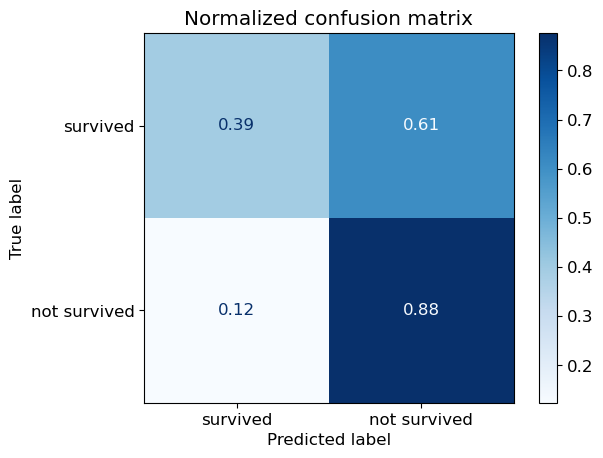

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
class_names = ['survived','not survived']
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [68]:
x_test.values.flatten()

array([ 3.    ,  1.    , 28.    , ...,  0.    , 27.7208,  0.    ])

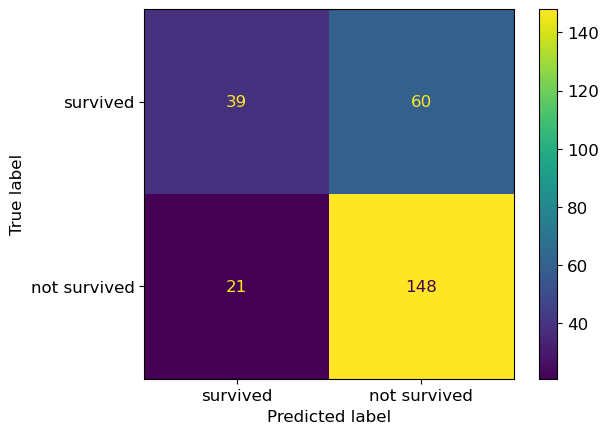

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=class_names)
disp.plot()

plt.show()

In [86]:
y_test.value_counts()

1    169
0     99
Name: Survived, dtype: int64

In [87]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6977611940298507


In [88]:
y_test.mean()

0.6305970149253731

In [89]:
1 - y_test.mean()

0.3694029850746269

In [90]:
max(y_test.mean(), 1 - y_test.mean())

0.6305970149253731

In [91]:
print('True: ', y_test.values[0:25])
print('False:', y_pred[0:25])

True:  [1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0]
False: [1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1]


In [92]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 39  60]
 [ 21 148]]


In [93]:
print('True', y_test.values[0:25])
print('Pred', y_pred[0:25])

True [1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0]
Pred [1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1]


In [94]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 39  60]
 [ 21 148]]


In [95]:
print((TP + TN) / float(TP + TN + FP + FN))

0.6977611940298507


In [96]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.30223880597014924
0.3022388059701493


In [97]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.8757396449704142
0.8757396449704142


In [98]:
specificity = TN / (TN + FP)

print(specificity)

0.3939393939393939


In [99]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.6060606060606061
0.6060606060606061


In [100]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7115384615384616
0.7115384615384616


In [101]:
# print the first 10 predicted probabilities of class membership
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.predict_proba(x_test)[0:20]

array([[0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8]])

In [102]:
model.predict_proba(x_test)[0:10, 1]

array([0.8, 1. , 0.6, 0.4, 0.2, 0.8, 0.2, 0.2, 0. , 0.8])

Text(0, 0.5, 'Frequency')

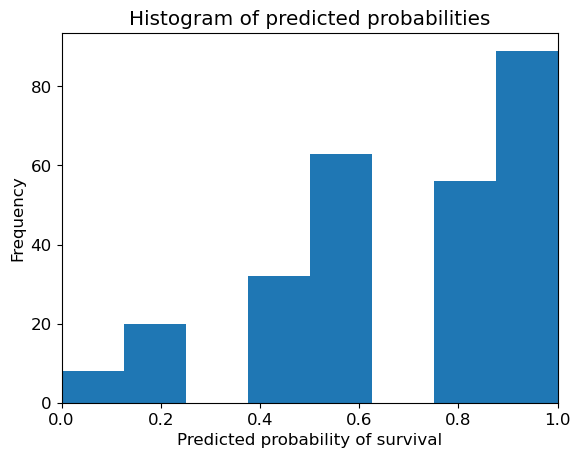

In [103]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['font.size'] = 12


# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [104]:
from sklearn.preprocessing import binarize

y_pred_class = binarize(y_pred_prob.reshape(-1, 1))[0:]

In [105]:
y_pred_prob[0:10]

array([0.8, 1. , 0.6, 0.4, 0.2, 0.8, 0.2, 0.2, 0. , 0.8])

In [106]:
y_pred_class[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [107]:
print(confusion)

[[ 39  60]
 [ 21 148]]


In [108]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[  6  93]
 [  2 167]]


In [109]:
print (TN / float(TN + FN))

0.65


In [110]:
print(TP / float(TP + FP))

0.7115384615384616


In [111]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.797621182236567


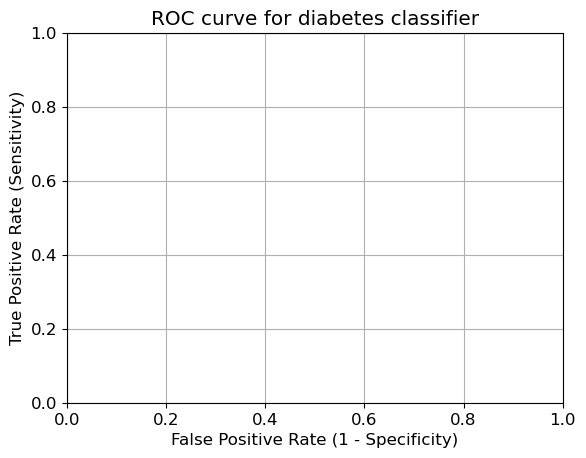

In [156]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [115]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(0.5)

Sensitivity: 0.8757396449704142
Specificity: 0.3939393939393939


In [116]:
evaluate_threshold(0.3)

Sensitivity: 0.9467455621301775
Specificity: 0.19191919191919193


In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean()

1.0

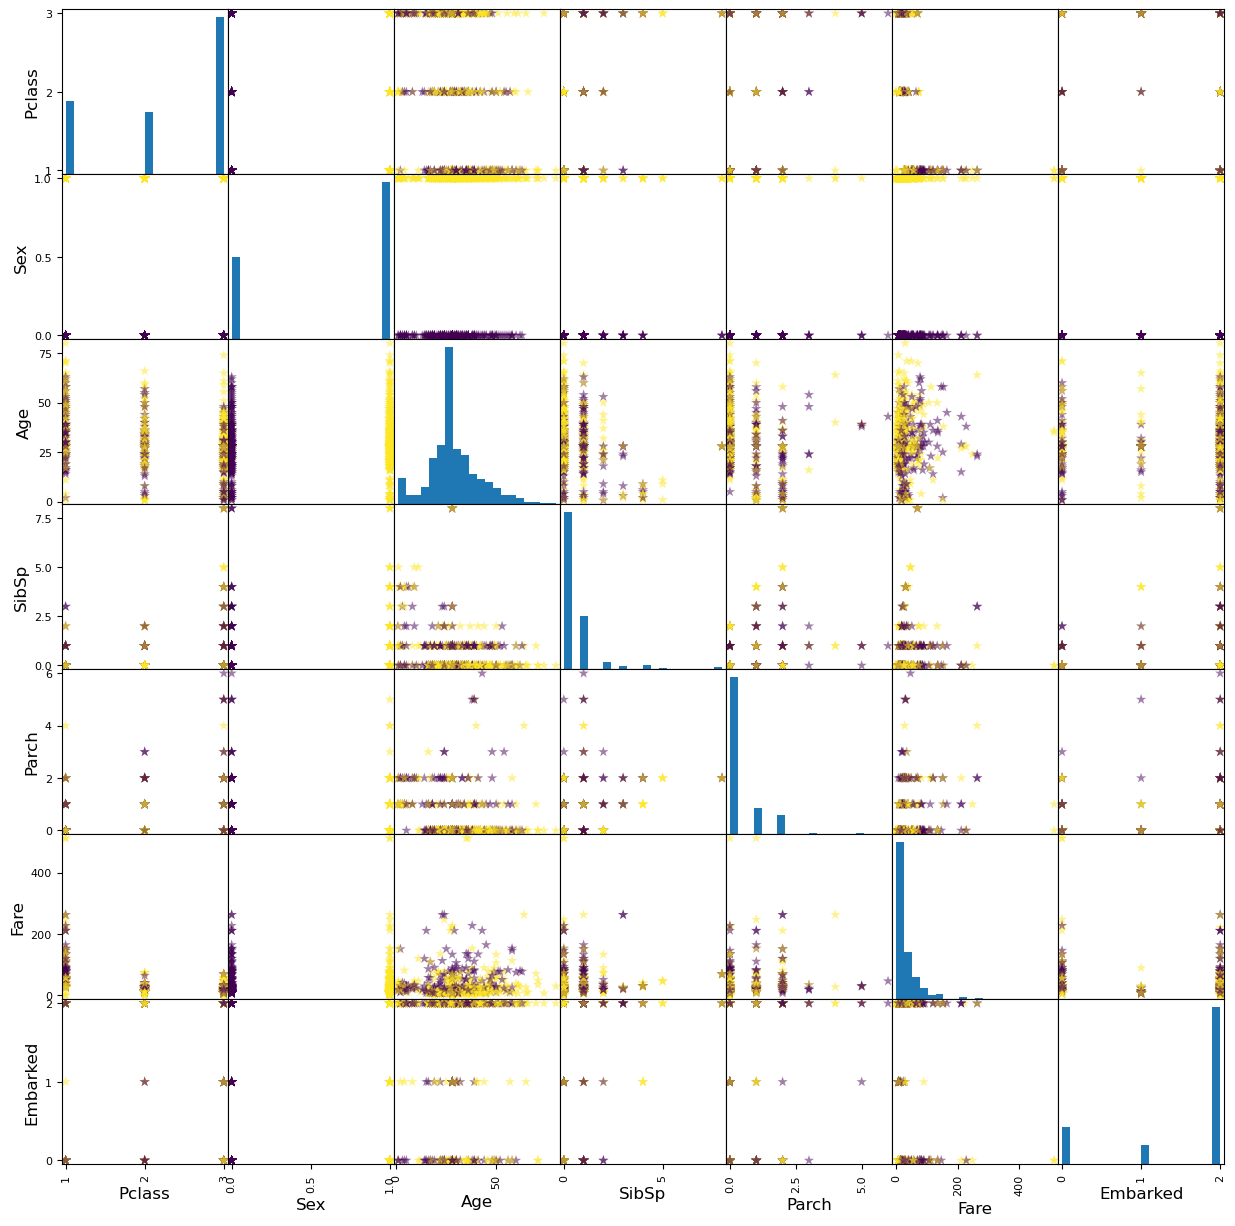

In [118]:
from pandas.plotting import scatter_matrix
data = pd.DataFrame(x_train,columns = feature_df)
# Create a scatter matrix from the data frame, color by y_train
grr = scatter_matrix(data, c=y_train, figsize=(15,15),
                       marker='*', hist_kwds={'bins':20}, s=60,
                       alpha=0.5)

array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Sex', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Embarked', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Age', ylabel='Sex'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Sex'>,
        <AxesSubplot:xlabel='Parch', ylabel='Sex'>,
        <AxesSubplot:xlabel='Fare', ylabel='Sex'>,
        <AxesSubplot:xlabel='Embarked', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='A

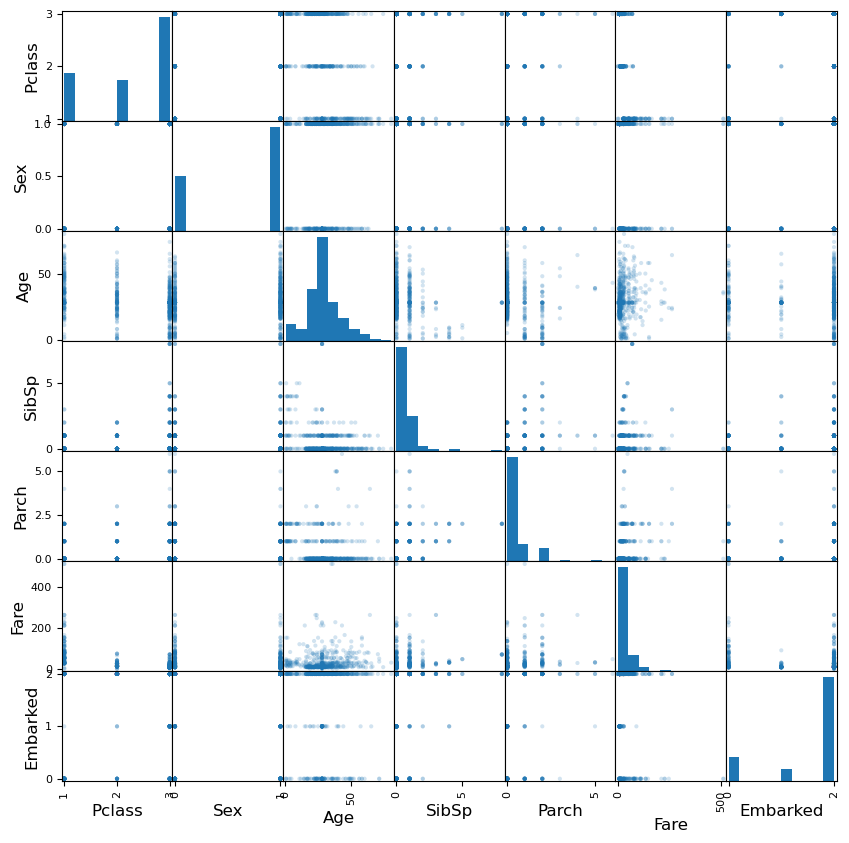

In [119]:
scatter_matrix(data, alpha=0.2, figsize=(10, 10))

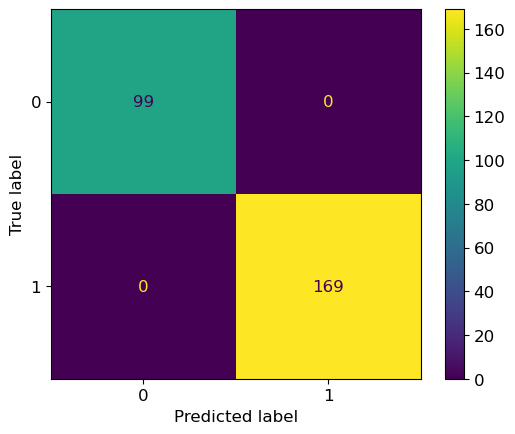

In [123]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()

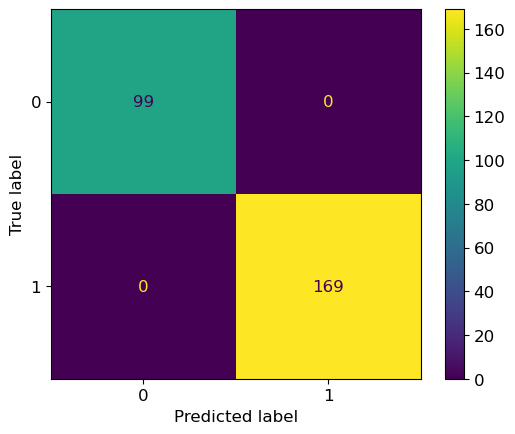

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [125]:
x_new = x_test[3:4]
np.array(x_new)

array([[  1.    ,   0.    ,  28.    ,   1.    ,   0.    , 146.5208,
          0.    ]])

In [126]:
df['Survived'] = df['Survived'].replace({0:'not survived',1:'survived'})

In [127]:
df['Survived'] = df['Survived'].replace({0:'not survived',1:'survived'})
x_new = x_test[0:1]
np.array(x_new)
prediction = model.predict(x_new)
print("Prediction: {}".format(prediction))
try:
    print("Predicted target name: {}".format(
        df['Survived'][prediction][1]))
except:
    print("Predicted target name: {}".format(
        df['Survived'][prediction][0]))

Prediction: [1]
Predicted target name: not survived


In [130]:
df['Survived'][prediction][1]

'not survived'

In [131]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))
# Alternatively, use the .score() method for the knn object
print("Test set score: {:.2f}".format(model.score(x_test, y_test)))

Test set score: 1.00
Test set score: 1.00


In [132]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
feature = list(df.columns)
feature.remove('Survived')
feature

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

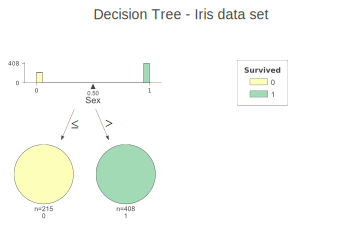

In [134]:
from dtreeviz.trees import dtreeviz 
viz = dtreeviz(clf, 
               x_data=x_train,
               y_data=y_train,
               target_name='Survived',
               feature_names=feature, 
               class_names=[0,1], 
               title="Decision Tree - Iris data set")
viz

In [135]:
import graphviz
dot = graphviz.Digraph('round-table', comment='The Round Table') 
dot

In [136]:
feature = list(df.columns)
feature.remove('Survived')


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [138]:
from xgboost.core import Booster
xg = Booster()
xg.fit(x_train,y_train)

AttributeError: 'Booster' object has no attribute 'fit'

In [70]:
from xgboost import XGBRFClassifier
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = XGBRFClassifier(**param_dist)

clf.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric='logloss',
        verbose=True)

evals_result = clf.evals_result()
evals_result

[0]	validation_0-logloss:0.12952	validation_1-logloss:0.13193


{'validation_0': OrderedDict([('logloss', [0.12951564176507402])]),
 'validation_1': OrderedDict([('logloss', [0.13192580100982937])])}

In [71]:
len(y_test.values)

268

In [72]:
y_test.value_counts()

1    169
0     99
Name: Survived, dtype: int64

In [73]:
count = 0
for i in range(len(x_test)):
    x_new = x_test[i:i+1]
    np.array(x_new)
    prediction = clf.predict(x_new)
    if prediction < 0.5:
        prediction = 0
    else:
        prediction = 1
    print("Prediction: {}".format(prediction))
    
    print("Predicted target name: {}".format(df['Survived'][prediction]))
    if df['Survived'][prediction] == 'not survived':
        count += 1
print('Not Survived',count)

Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted t

Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 0
Predicted target name: 1
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted target name: 0
Prediction: 1
Predicted t

In [74]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [76]:
feature = list(df.columns)
feature.remove('Survived')
#feature.remove('Fare')

In [77]:
from sklearn.preprocessing import LabelEncoder
for f in df.columns:
    if df[f].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         1       3    1  22.0      1      0   7.2500         2
1         0       1    0  38.0      1      0  71.2833         0
2         0       3    0  26.0      0      0   7.9250         2
3         0       1    0  35.0      1      0  53.1000         2
4         1       3    1  35.0      0      0   8.0500         2

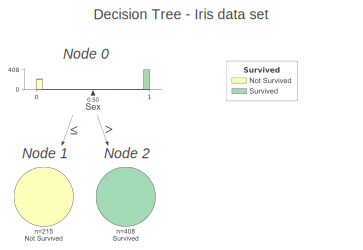

In [78]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(model, 
               x_data=x_train,
               y_data=y_train,
               target_name='Survived',
               feature_names=feature, 
               class_names=['Not Survived','Survived'],
               title="Decision Tree - Iris data set",
               show_node_labels = True
               #orientation="LR", 
               #X=x_test[0:1]
              )  
viz

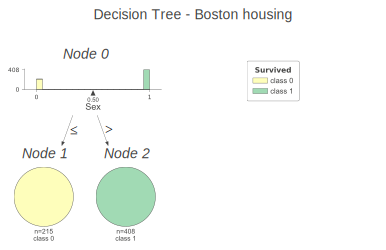

In [79]:
from dtreeviz.trees import dtreeviz 
viz = dtreeviz(model,
               x_data=x_train,
               y_data=y_train,
               target_name='Survived',
               feature_names=feature,
               title="Decision Tree - Boston housing",
               show_node_labels = True, 
               #show_just_path=True
              )
              
viz

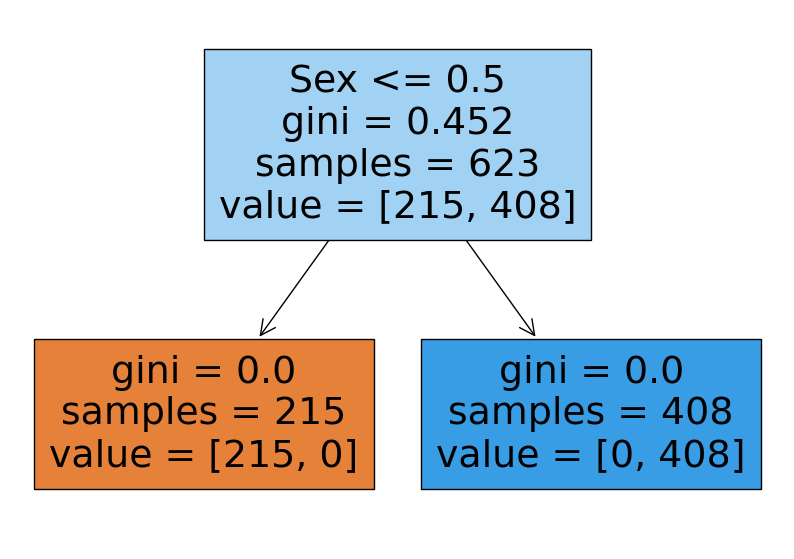

In [80]:
from sklearn import tree
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(model, feature_names=feature, filled=True)

Text(0, 0.5, 'Frequency')

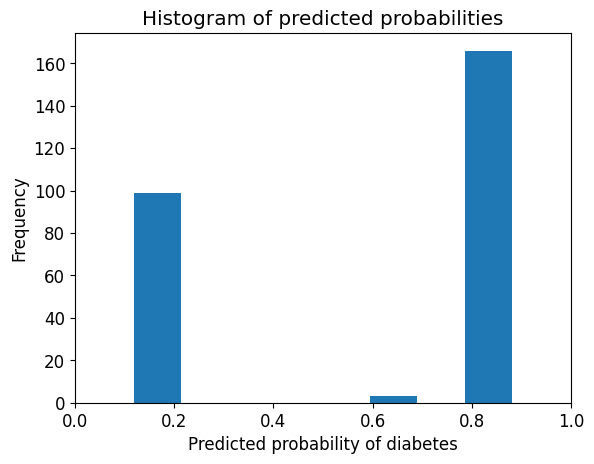

In [86]:
# store the predicted probabilities for class 1
y_pred_prob = clf.predict_proba(x_test)[:, 1]

import matplotlib.pyplot as plt
%matplotlib inline
# adjust the font size 
plt.rcParams['font.size'] = 12


# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

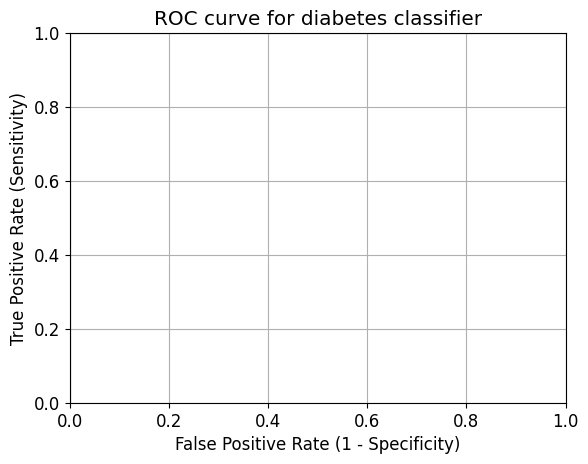

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [88]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [85]:
a = np.array([[5,3,2],[3,6,7],[2,10,12]])


np.linalg.det(a)

-20.000000000000085

In [197]:
import copy
def determinant_recursive(A, total=0):
    # Section 1: store indices in list for row referencing
    indices = list(range(len(A)))
     
    # Section 2: when at 2x2 submatrices recursive calls end
    if len(A) == 2 and len(A[0]) == 2:
        val = A[0][0] * A[1][1] - A[1][0] * A[0][1]
        return val
 
    # Section 3: define submatrix for focus column and 
    #      call this function
    for fc in indices: # A) for each focus column, ...
        # find the submatrix ...
        As = copy.deepcopy(A) # B) make a copy, and ...
        As = As[1:] # ... C) remove the first row
        height = len(As) # D) 
 
        for i in range(height): 
            # E) for each remaining row of submatrix ...
            #     remove the focus column elements
            As[i] = As[i][0:fc] + As[i][fc+1:] 
 
        sign = (-1) ** (fc % 2) # F) 
        # G) pass submatrix recursively
        sub_det = determinant_recursive(As)
        # H) total all returns from recursion
        total += sign * A[0][fc] * sub_det 
 
    return total

In [225]:
import numpy as np 
import copy
def determinant_recursive(A, total=0):
    # Section 1: store indices in list for row referencing
    indices = list(range(len(A)))
     
    # Section 2: when at 2x2 submatrices recursive calls end
    if len(A) == 2 and len(A[0]) == 2:
        val = A[0][0] * A[1][1] - A[1][0] * A[0][1]
        return val
 
    # Section 3: define submatrix for focus column and 
    #      call this function
    for fc in indices: # A) for each focus column, ...
        # find the submatrix ...
        As = copy.deepcopy(A) # B) make a copy, and ...
        As = As[1:] # ... C) remove the first row
        height = len(As) # D) 
 
        for i in range(height): 
            # E) for each remaining row of submatrix ...
            #     remove the focus column elements
            As[i] = As[i][0:fc] + As[i][fc+1:] 
 
        sign = (-1) ** (fc % 2) # F) 
        # G) pass submatrix recursively
        sub_det = determinant_recursive(As)
        # H) total all returns from recursion
        total += sign * A[0][fc] * sub_det 
 
    return total

 
 
A = [[-2,2,-3],[-1,1,3],[2,0,-1]] # Matrix from wiki
Det = determinant_recursive(A)
npDet = np.linalg.det(A)
print("Determinant of A is", round(Det,9))
print("The Numpy Determinant of A is", round(npDet,9))
print()
 
A = [[1,2,3],[4,5,6],[7,8,9]]
Det = determinant_recursive(A)
npDet = np.linalg.det(A)
print("Determinant of A is", Det)
print("The Numpy Determinant of A is", round(npDet,9))
print()

A = [[1,2,3,4],[8,5,6,7],[9,12,10,11],[13,14,16,15]]
Det = determinant_recursive(A)
npDet = np.linalg.det(A)
print("Determinant of A is", Det)
print("The Numpy Determinant of A is", round(npDet,9))
print()
 
A = [[1,2,3,4,1],[8,5,6,7,2],[9,12,10,11,3],[13,14,16,15,4],[10,8,6,4,2]]
Det = determinant_recursive(A)
npDet = np.linalg.det(A)
print("Determinant of A is", Det)
print("The Numpy Determinant of A is", round(npDet,9))
print()

Determinant of A is 18
The Numpy Determinant of A is 18.0

Determinant of A is 0
The Numpy Determinant of A is -0.0

Determinant of A is -348
The Numpy Determinant of A is -348.0

Determinant of A is -240
The Numpy Determinant of A is -240.0



In [224]:
from numpy import linalg as LA
c = np.array([[1, 2, 3],
       [4,  5,  6],
       [ 7,  8,  9]])
np.abs(round(np.linalg.det(c),9))

0.0

In [218]:
b = [[6,1,1], [4, -2, 5], [2,8,7]]
c = [[102,2,11], [256,12,6], [19,8,350]]
print(c) 
Det = determinant_recursive(c)
print(Det)
print(round(np.linalg.det(c))) 
print(6*(5*9 - 6*8) - 2*(4*9 - 6*7) + 3*(4*8 - 5*7))

[[102, 2, 11], [256, 12, 6], [19, 8, 350]]
264552
264552
-15
